In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('world-happiness-report.csv')
df = df[df['year'] == 2020]
x_name = 'Healthy life expectancy at birth'
y_name = 'Freedom to make life choices'
tooltip_name = 'Country name'
x = df[x_name]

y = df[y_name]
tt = df[tooltip_name].values


df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891,0.679,0.265
51,Argentina,2020,5.901,9.850,0.897,69.2,0.823,-0.122,0.816,0.764,0.342
79,Australia,2020,7.137,10.760,0.937,74.2,0.905,0.210,0.491,0.769,0.205
92,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464,0.769,0.206
117,Bahrain,2020,6.173,10.620,0.848,69.7,0.945,0.132,NaN,0.790,0.297
...,...,...,...,...,...,...,...,...,...,...,...
1850,United States,2020,7.028,11.001,0.937,68.1,0.850,0.034,0.678,0.787,0.295
1865,Uruguay,2020,6.310,9.937,0.921,69.2,0.908,-0.084,0.491,0.807,0.265
1893,Venezuela,2020,4.574,NaN,0.805,66.9,0.612,NaN,0.811,0.722,0.396
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810,0.691,0.345


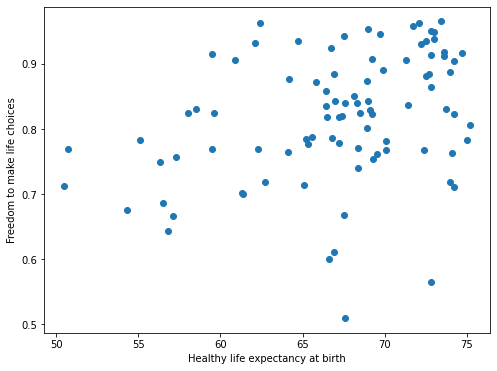

In [3]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.scatter(x, y)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.show()

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


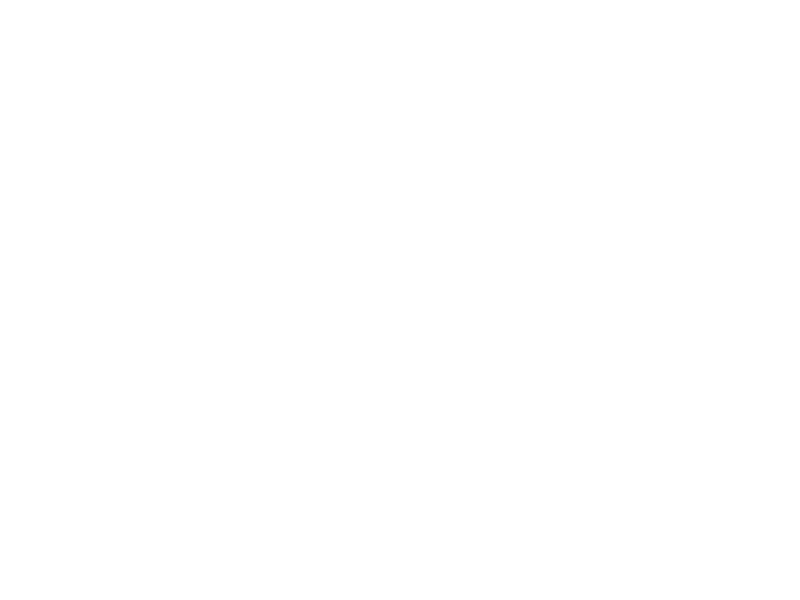

In [5]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.scatter(x,y)
plt.xlabel(x_name)
plt.ylabel(y_name)
annot_x = (plt.xlim()[1] + plt.xlim()[0])/2
annot_y = (plt.ylim()[1] + plt.ylim()[0])/2
txt = ax.text(annot_x, annot_y, "Chart Ready", 
              ha='center', fontsize=36, color='#DD4012')
def hover(event):
    txt.set_text("")
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

<IPython.core.display.Javascript object>


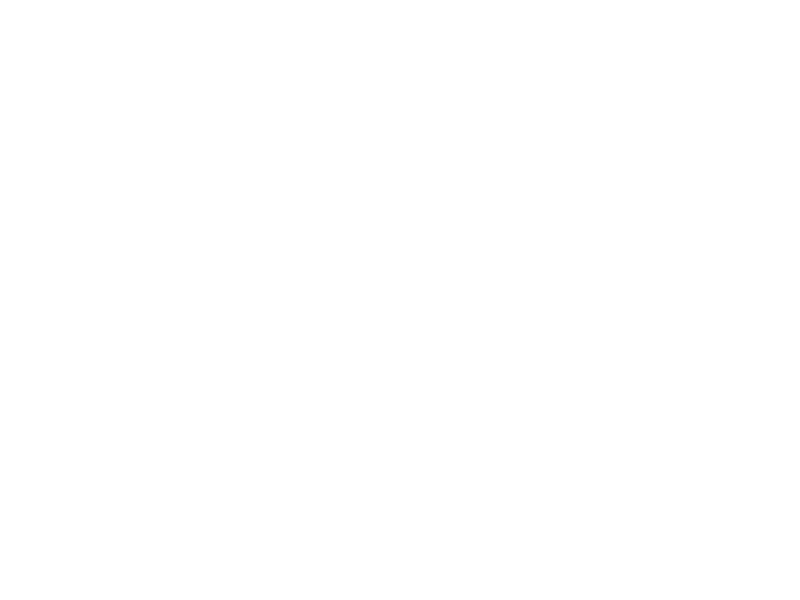

In [6]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8,6))
ax.scatter(x,y)
plt.xlabel(x_name)
plt.ylabel(y_name)
lnx = plt.plot([60,60], [0,1.5], color='black', linewidth=0.3)
lny = plt.plot([0,100], [1.5,1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')
plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)
def hover(event):
    lnx[0].set_data([event.xdata, event.xdata], [0, 1.5])
    lnx[0].set_linestyle('--')
    lny[0].set_data([0,100], [event.ydata, event.ydata])
    lny[0].set_linestyle('--')
    
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

<IPython.core.display.Javascript object>


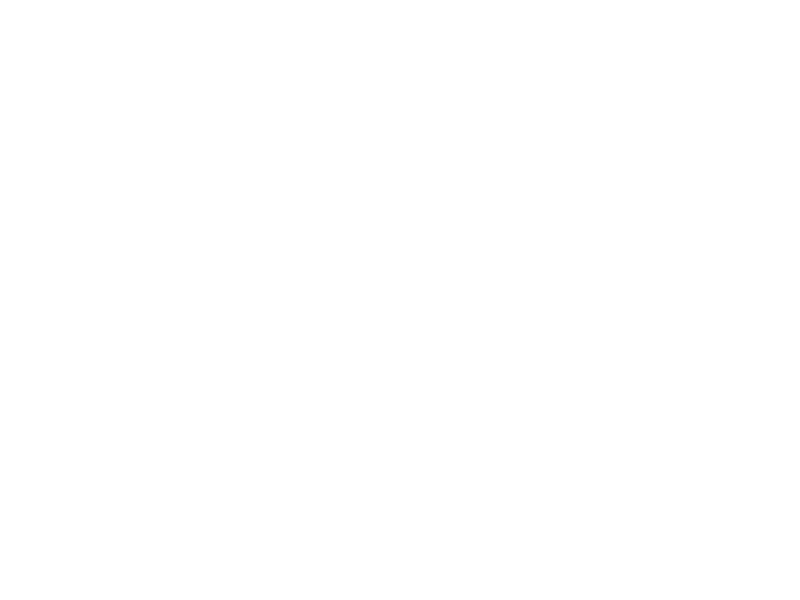

In [7]:
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8,6))
# plot and labels
sc = ax.scatter(x,y)
plt.xlabel(x_name)
plt.ylabel(y_name)
# cursor grid lines
lnx = plt.plot([60,60], [0,1.5], color='black', linewidth=0.3)
lny = plt.plot([0,100], [1.5,1.5], color='black', linewidth=0.3)
lnx[0].set_linestyle('None')
lny[0].set_linestyle('None')
# annotation
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points")
annot.set_visible(False)
# xy limits
plt.xlim(x.min()*0.95, x.max()*1.05)
plt.ylim(y.min()*0.95, y.max()*1.05)
def hover(event):
    # check if event was in the axis
    if event.inaxes == ax:
        # draw lines and make sure they're visible
        lnx[0].set_data([event.xdata, event.xdata], [0, 1.5])
        lnx[0].set_linestyle('--')
        lny[0].set_data([0,100], [event.ydata, event.ydata])
        lny[0].set_linestyle('--')
        lnx[0].set_visible(True)
        lny[0].set_visible(True)
        
        # get the points contained in the event
        cont, ind = sc.contains(event)
        if cont:
            # change annotation position
            annot.xy = (event.xdata, event.ydata)
            # write the name of every point contained in the event
            annot.set_text("{}".format(', '.join([tt[n] for n in ind["ind"]])))
            annot.set_visible(True)    
        else:
            annot.set_visible(False)
    else:
        lnx[0].set_visible(False)
        lny[0].set_visible(False)
fig.canvas.mpl_connect("motion_notify_event", hover)
plt.show()

In [8]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


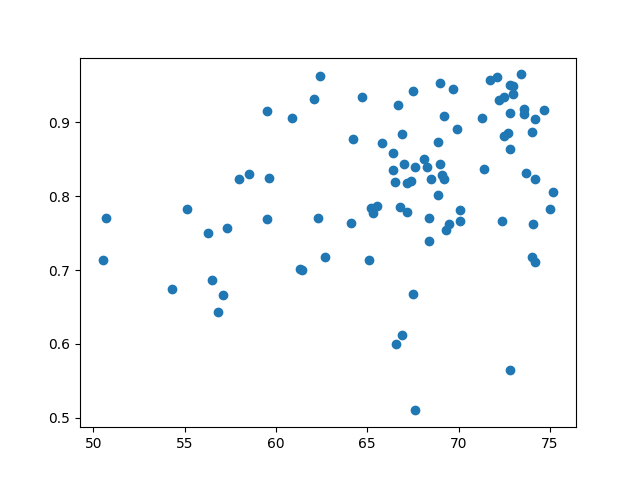

In [9]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib widget
fig, ax = plt.subplots()
sc = ax.scatter(x,y)
# by default the tooltip is displayed "onclick"
# we can change it by setting hover to True
cursor = mplcursors.cursor(sc, hover=True)
# by default the annotation displays the xy positions
# this is to change it to the countries name
@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=tt[sel.target.index])
plt.show()

In [10]:
df = df.sort_values('Log GDP per capita')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1792,Uganda,2020,4.641,7.684,0.800,56.5,0.687,0.147,0.878,0.699,0.425
550,Ethiopia,2020,4.549,7.711,0.823,59.5,0.769,0.188,0.784,0.669,0.252
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346
1711,Tanzania,2020,3.786,7.881,0.740,58.5,0.830,0.295,0.521,0.686,0.271
1696,Tajikistan,2020,5.373,8.080,0.790,64.7,NaN,-0.040,0.550,0.749,0.344
...,...,...,...,...,...,...,...,...,...,...,...
773,Iran,2020,4.865,NaN,0.757,66.6,0.600,NaN,0.710,0.582,0.470
918,Kosovo,2020,6.294,NaN,0.792,NaN,0.880,NaN,0.910,0.726,0.201
1087,Malta,2020,6.157,NaN,0.938,72.2,0.931,NaN,0.675,0.601,0.411
1681,Taiwan Province of China,2020,6.751,NaN,0.901,NaN,0.799,NaN,0.711,0.845,0.083


In [11]:
df = df[df['Log GDP per capita'].notna()]
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1792,Uganda,2020,4.641,7.684,0.800,56.5,0.687,0.147,0.878,0.699,0.425
550,Ethiopia,2020,4.549,7.711,0.823,59.5,0.769,0.188,0.784,0.669,0.252
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346
1711,Tanzania,2020,3.786,7.881,0.740,58.5,0.830,0.295,0.521,0.686,0.271
1696,Tajikistan,2020,5.373,8.080,0.790,64.7,NaN,-0.040,0.550,0.749,0.344
...,...,...,...,...,...,...,...,...,...,...,...
1850,United States,2020,7.028,11.001,0.937,68.1,0.850,0.034,0.678,0.787,0.295
1309,Norway,2020,7.290,11.042,0.956,73.4,0.965,0.075,0.271,0.823,0.216
1820,United Arab Emirates,2020,6.458,11.053,0.827,67.5,0.942,0.060,NaN,0.752,0.298
1661,Switzerland,2020,7.508,11.081,0.946,74.7,0.917,-0.064,0.280,0.769,0.193
